In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import numpy as np
import imageio

In [2]:
x = torch.unsqueeze(torch.linspace(-10, 10, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = -4*x.pow(2)+x.pow(3) +300*torch.rand(x.size())         # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

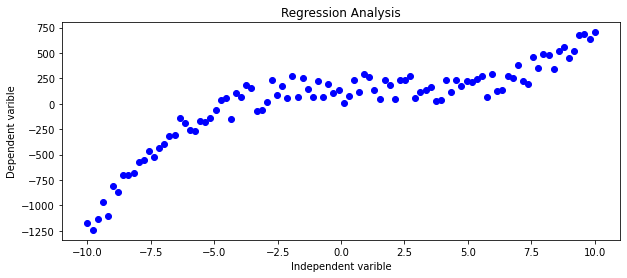

In [3]:
# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
# plt.savefig('curve_2_bignet.png')
plt.show()

In [4]:
# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

100%|██████████| 2000/2000 [00:12<00:00, 162.85it/s]


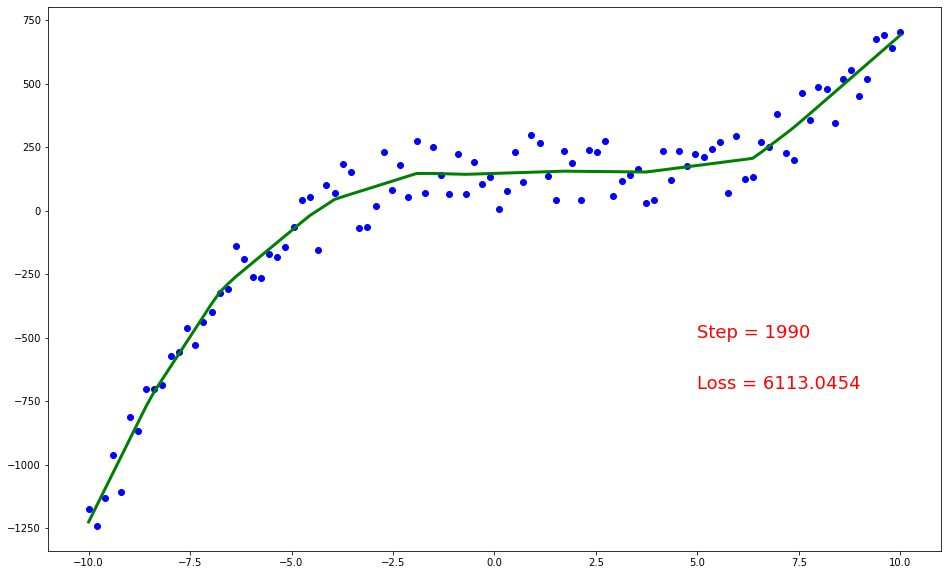

In [5]:
my_images = []
fig, ax = plt.subplots(figsize=(16,10))

# start training
for t in tqdm(range(2000)):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
#         ax.set_xlim(-11.0, 13.0)
#         ax.set_ylim(-1.1, 1.2)
        ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
        ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        ax.text(5, -500, 'Step = %d' % t, fontdict={'size': 18, 'color':  'red'})
        ax.text(5, -700, 'Loss = %.4f' % loss.data.numpy(),
                fontdict={'size': 18, 'color':  'red'})

        # Used to return the plot as an image array 
        # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
        fig.canvas.draw()       # draw the canvas, cache the renderer
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        my_images.append(image)
    
    


# save images as a gif    
imageio.mimsave('./2d-fit.gif', my_images, fps=10)